# Plotting the narrative arc of a story

This is an attempt to replicate the approach of [Boyd et al. (2020)](https://www.science.org/doi/10.1126/sciadv.aba2196) based on the [narrative arc category dictionaries](https://osf.io/2ztvq/?view_only=3ec61cf65c08476f926624893d0d6fc3) shared on OSF. 

**COLAB NOTEBOOK VERSION:** To run this notebook in CoLab, please [click here](https://colab.research.google.com/github/senthilchandrasegaran/IDEM105-EDI/blob/main/05_AON-analysis.ipynb).

In [1]:
import re
import nltk
import math
import pandas as pd
import seaborn as sns
from nltk import word_tokenize

# nltk.download('punkt_tab')  # comment this line after the first time you run this code.

## Insert story here.
You can copy-paste your own story to replace the text below.

**NOTE:**
Please take care not to delete the quotation marks (`"""`) above and below the text.

In [2]:
story_text = """

Once upon a time, I encountered a chair. Not just any chair, but one that spoke a language of design I hadn’t known I could understand. It was the Eames Lounge Chair—a masterpiece of form meeting function. 
The first time I saw it, it was in the corner of a quiet library, bathed in soft light. Its curved walnut veneer gleamed like a polished gemstone, and the black leather cushions looked as inviting as a cloud. But it wasn’t just its appearance that captivated me. It was the story embedded in its curves.
This chair was designed not to impress but to embrace. Charles and Ray Eames, the visionaries behind it, wanted to create something that felt like a "warm, receptive look of a well-used first baseman's mitt." The idea struck me: design could be more than utility or beauty—it could evoke emotion and connection.
I sat in it, hesitant at first, as though I might disturb the perfection. But the moment I leaned back, I felt the thoughtfulness of every detail. The angle of the backrest cradled my spine just right. The swivel base turned with a whisper, as if anticipating my movements. It was more than comfortable—it was comforting.
That experience changed how I saw the world. I began to notice the intention in other designs—the way a faucet handle fit perfectly in my hand, the satisfying *click* of a well-engineered pen, the rhythm of a thoughtfully designed webpage. I fell in love not just with the chair but with the very idea that design could bridge the gap between the practical and the poetic.
And ever since, I’ve been chasing that feeling, seeking out objects, spaces, and ideas that carry that same sense of care and connection. Because when design is done well, it reminds us not just of what we need, but of what we deserve—a world made with love.

"""

## Dictionary categories
The narrative arc is calculated along three dimensions---staging, plot progression, and cognitive tension. The terms belonging under each dimension is written as a separate dictionary category below.

In [3]:
staging_terms = ['a', 'about', 'above', 'abt', 'across', 'after', 'against', 'ahead', 'along', 'amid', 'amidst', 'among*', 'an', 'around', 'as', 'at', 'atop', 'away', 'before', 'behind', 'below', 'beneath', 'beside', 'besides', 'between', 'beyond', 'by', 'despite', 'down', 'during', 'except', 'for', 'from', 'hereafter', 'in', 'including', 'inside', 'insides', 'into', 'minus', 'near', 'of', 'off', 'on', 'onto', 'out', 'outside', 'over', 'plus', 'regarding', 'respecting', 'sans', 'since', 'than', 'the', 'through*', 'thru', 'til', 'till', 'to', 'toward*', 'under', 'underneath', 'unless', 'unlike', 'until', 'unto', 'up', 'upon', 'versus', 'via', 'vs', 'with', 'within', 'without']

In [4]:
plot_progression_terms = ['absolutely', 'actually', 'again', 'aint', "ain't", 'all', 'almost', 'already', 'also', 'alternatively', 'altho', 'although', 'altogether', 'always', 'am', 'and', 'another', 'any', 'anybod*', 'anyhow', 'anymore', 'anyone*', 'anything', 'anytime', 'anyway*', 'anywhere', 'apparently', 'are', 'arent', "aren't", 'awhile', 'back', 'barely', 'basically', 'bc', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'being', 'briefly', 'but', 'can', 'cannot', 'cant', "can't", 'certainly', 'clearly', 'commonly', 'completely', 'constantly', 'continually', 'cos', 'could', 'couldnt', "couldn't", 'couldve', "could've", 'coz', 'cuz', 'deez', 'definitely', 'did', 'didnt', "didn't", 'do', 'does', 'doesnt', "doesn't", 'doing', 'done', 'dont', "don't", 'either', 'else', 'especially', 'essentially', 'even', 'eventually', 'ever', 'everybod*', 'everyday', 'everyone*', 'everything*', 'everytime', 'everywhere*', 'exclusively', 'extremely', 'fairly', 'finally', 'forever', 'fortunately', 'frankly', 'frequently', 'fully', 'fundamentally', 'generally', 'gunna', 'had', 'hadnt', "hadn't", 'hardly', 'has', 'hasnt', "hasn't", 'have', 'havent', "haven't", 'having', 'he', "he'd", 'hence', 'henceforth', 'her', 'here', 'herein', 'heres', "here's", 'hereto*', 'hers', 'herself', 'hes', "he's", 'him', 'himself', 'his', 'hissel*', 'hopefully', 'how', 'howd', "how'd", 'however', 'howre', "how're", 'hows', "how's", 'i', 'id', "i'd", 'idc', 'idgaf', 'idk', 'idontknow', 'idve', "i'd've", 'if', 'ikr', "i'll", 'ily*', 'im', "i'm", 'ima', 'imean', 'imma', 'immediately', 'indeed', 'instead', 'is', 'isnt', "isn't", 'it', 'itd', "it'd", 'itll', "it'll", 'its', "it's", 'itself', 'ive', "i've", 'jus', 'just', 'juz', 'lately', 'let', 'lets', "let's", 'mainly', 'may', 'maybe', 'me', 'meanwhile', 'methinks', 'might', 'mightve', "might've", 'mine', 'most', 'mostly', 'must', 'mustnt', "mustn't", "must'nt", 'mustve', "must've", 'my', 'myself', 'nah*', 'namely', 'nearly', 'neednt', "needn't", "need'nt", 'negat*', 'neither', 'never', 'nevertheless', 'no', 'nobod*', 'noes', 'none', 'nonetheless', 'nope', 'nor', 'normally', 'not', 'nothing', 'notwithstanding', 'now', 'nowhere', 'np', 'obviously', 'often', 'oneself', 'only', 'or', 'originally', 'other', 'others', 'otherwise', 'ought', 'oughta', 'oughtnt', "oughtn't", "ought'nt", 'oughtve', "ought've", 'our', 'ours', 'ourselves', 'particularly', 'perhaps', 'possibily', 'potentially', 'practically', 'presently', 'presumedly', 'presumingly', 'primarily', 'principally', 'probably', 'prolly', 'quite', 'randomly', 'rarely', 'rather', 'really', 'regardless', 'regularly', 'relatively', 'respectively', 'seldomly', 'separately', 'seriously', 'shall', 'shant', "shan't", 'she', "she'd", "she'll", 'shes', "she's", 'shortly', 'should', 'shouldnt', "shouldn't", "should'nt", 'shouldve', "should've", 'simply', 'so', 'some', 'somebod*', 'someday', 'somehow', 'someone*', 'something*', 'sometime', 'sometimes', 'somewhat', 'somewhere', 'soon', 'sooo*', 'specifically', 'still', 'stuff', 'subsequently', 'such', 'suddenly', 'supposedly', 'surely', 'that', 'thatd', "that'd", 'thatll', "that'll", 'thats', "that's", 'thee', 'their*', 'them', 'themself', 'themselves', 'then', 'there', 'thereafter', 'therefor*', 'theres', "there's", 'these', 'they', 'theyd', "they'd", 'theyll', "they'll", 'theyre', "they're", 'theyve', "they've", 'thine', 'thing*', 'this', 'tho', "tho'", 'those', 'thou', 'though', 'thoust', 'thus*', 'thy', 'thyself', 'too', 'totally', 'truly', 'tryna', 'typically', 'u', 'uh-uh', 'ultimately', 'unable', 'uncommonly', 'ur', 'us', 'usually', 'vastly', 'very', 'virtually', 'visibly', 'wanna', 'was', 'wasnt', "wasn't", 'we', "we'd", 'well', "we'll", 'were', "we're", 'werent', "weren't", 'weve', "we've", 'what', 'whatd', "what'd", 'whatever', 'whatll', "what'll", 'whats', "what's", 'when', "when'*", 'whence', 'whenever', 'where', 'whereas', 'whereby', "where'd", 'wherefore', 'wherein', 'whereof', 'wherever', 'whether', 'which', 'whichever', 'while', 'whilst', 'whither', 'who', 'whod', "who'd", 'whoever', 'wholl', "who'll", 'wholly', 'whom', 'whomever', 'whos', "who's", 'whose', 'whosever', 'whoso*', 'why', "why'*", 'whyever', 'will', 'wont', "won't", 'would', 'wouldnt', "wouldn't", 'wouldve', "would've", 'ya', 'yall', "y'all", "ya'll*", 'yalls', "y'all's", 'ye', 'yet', 'yinz*', 'you', 'youd', "you'd", 'youll', "you'll", 'your', 'youre', "you're", 'yours', 'yourself', 'yourselves', 'youve', "you've"]

In [5]:
cognitive_tension_terms = ['abnormal*', 'acknowledg*', 'actually', 'adjust*', 'admit', 'admits', 'admitted', 'admitting', 'affect', 'affected', 'affecting', 'affects', 'afterthought*', 'also', 'alternate', 'alternative', 'alternatively', 'alternatives', 'altho', 'although', 'ambigu*', 'analy*', 'answer*', 'apparent', 'apparently', 'apprehens*', 'approximat*', 'arbitrar*', 'assess*', 'assum*', 'assur*', 'attent*', 'attribut*', 'aware*', 'based', 'basically', 'basis', 'bc', 'because', 'belief*', 'believe', 'believed', 'believes', 'believing', 'brain*', 'but', 'calcul*', 'categor*', 'caus*', 'certain', 'certainly', 'choice*', 'choos*', 'clarif*', 'clue', 'cogniz*', 'cohere*', 'compel*', 'complex', 'complexity', 'complicat*', 'compreh*', 'concentrat*', 'conclud*', 'conclus*', 'confuse', 'confused', 'confuses', 'confusing', 'confusion*', 'conjectur*', 'conscious*', 'consequen*', 'consider', 'consideration', 'considered', 'considering', 'considers', 'contemplat*', 'contingen*', 'convinc*', 'correct*', 'correlat*', 'cos', 'coz', 'creativ*', 'curio*', 'cuz', 'decide', 'decided', 'decides', 'deciding', 'decis*', 'deduc*', 'deem*', 'define', 'defined', 'defines', 'defining', 'definite', 'definitely', 'definition', 'definitive*', 'desir*', 'despite', 'detect', 'detected', 'detection', 'detects', 'determine', 'determined', 'determines', 'determining', 'diagnos*', 'differentiat*', 'disbelie*', 'discern*', 'discover*', 'disillusion*', 'disorient*', 'distinguish*', 'distract*', 'doubt*', 'dubious*', 'dunno', 'effect*', 'either', 'else', 'enlighten*', 'essentially', 'estim*', 'evaluat*', 'evidence', 'evident*', 'examin*', 'except', 'exception', 'exceptions', 'expect*', 'experiment*', 'explain', 'explained', 'explaining', 'explains', 'explanat*', 'explicit*', 'explor*', 'fact', 'factor', 'facts', 'factual*', 'false*', 'feasible', 'feel', 'feeling', 'feelings', 'feels', 'felt', 'find', 'finding', 'findings', 'finds', 'foresee*', 'foresight*', 'forget*', 'forgot*', 'found', 'frankly', 'fundamental', 'fundamentally', 'fundamentals', 'generaliz*', 'generally', 'guess', 'guessed', 'guesses', 'guessing', 'guesstimat*', 'heed*', 'hesita*', 'hypothes*', 'hypothetic*', 'idea', 'ideal*', 'ideas', 'ideat*', 'identif*', 'idk', 'ignor*', 'ikr', 'imagin*', 'implica*', 'implicit*', 'implie*', 'imply*', 'impossible', 'indecis*', 'indeed', 'induc*', 'inevitab*', 'infer', 'inferen*', 'inferr*', 'infers', 'info', 'inform', 'information*', 'informative*', 'informed', 'informing', 'informs', 'inquir*', 'inscrut*', 'insight*', 'inspir*', 'instead', 'intend*', 'intent*', 'interpret*', 'irrefu*', 'justif*', 'kind of', 'kinda', 'kindof', 'kinds', 'knew', 'know', 'knowab*', 'knowing', 'knowledg*', 'known', 'knows', 'learn', 'learned', 'learner', 'learners', 'learning', 'learns', 'learnt', 'lesson*', 'likel*', 'logic*', 'mainly', 'may', 'maybe', 'meaning*', 'means', 'meant', 'meanwhile', 'meditat*', 'memorabl*', 'memories', 'memoris*', 'memoriz*', 'memory', 'methinks', 'mindful*', 'minus', 'mistak*', 'misunder*', 'myster*', 'namely', 'nevertheless', 'nonetheless', 'nor', 'notice', 'noticed', 'notices', 'noticing', 'obscur*', 'obvious', 'obviously', 'obviousness', 'odd', 'odder', 'oddest', 'opinion*', 'otherwise', 'outcome*', 'perhaps', 'plan', 'planned', 'planning', 'plans', 'ponder*', 'possibily', 'possible', 'potentially', 'predict*', 'presume', 'presumed', 'presumedly', 'presumes', 'presuming', 'presumingly', 'presumption*', 'presupp*', 'pretend*', 'probabil*', 'probable', 'probably', 'problem*', 'prolly', 'proof*', 'prove*', 'proving', 'provok*', 'purpose*', 'puzzl*', 'quer*', 'question', 'questioned', 'questioning', 'questions', 'random', 'randomly', 'randomness', 'rational*', 'realization*', 'realize', 'realized', 'realizes', 'realizing', 'reason*', 'recall*', 'reckon*', 'recogni*', 'recollect*', 'reconsider*', 'reevaluat*', 'regarding', 'regardless', 'remember', 'remembered', 'remembering', 'remembers', 'resolu*', 'resolv*', 'respective', 'respectively', 'result*', 'rethink*', 'revelat*', 'ruminat*', 'sans', 'savvy', 'scrut*', 'secret', 'secretive', 'secretively', 'secrets', 'seem', 'seemed', 'seeming*', 'seems', 'sense', 'sensed', 'senses', 'sensing', 'separately', 'since', 'skeptic*', 'solution*', 'solve', 'solved', 'solves', 'solving', 'somehow', 'sorta', 'sortof', 'sorts', 'sortsa', 'sought', 'specific', 'specifically', 'specifics', 'specify', 'spose', "s'pose", 'studied', 'studies', 'study', 'studying', 'suppose', 'supposed', 'supposes', 'supposing', 'supposition*', 'sure', 'surely', 'surmis*', 'suspect*', 'suspicio*', 'tentativ*', 'than', 'theor*', 'think', 'thinker*', 'thinking', 'thinks', 'thought', 'thoughtf*', 'thoughts', 'trick', 'tricked', 'trickier', 'trickiest', 'tricks', 'tricky', 'true', 'truest', 'truth*', 'unambigu*', 'unaware*', 'uncertain*', 'unclear*', 'undecided*', 'undeniab*', 'understand', 'understandab*', 'understanding*', 'understands', 'understood', 'undetermin*', 'undoubt*', 'unknowing', 'unknowingly', 'unknown', 'unlikel*', 'unquestion*', 'unresolv*', 'unsure*', 'vague', 'vaguely', 'vagueness', 'vaguer', 'vaguest', 'variab*', 'varied', 'varies', 'vary', 'wisdom', 'wise', 'wisely', 'wiser', 'wisest', 'wonder', 'wondered', 'wondering', 'wonders']

## Computing category scores
The functions below can be used to compute category scores as we have done so far in this course, i.e., count the number of matches between a given text and the terms in a given category, and divide this number by the total number of words in the text.

In [6]:
def count_matches(text, pattern):
    if pattern.startswith('*') :
        pattern = r"[A-Za-z]*" + pattern[1:]
        
    if pattern.endswith('*') :
        pattern = pattern[:-1] + r"[A-Za-z]*'"
    
    m = r"\b" + pattern + r"\b"
    matches = re.findall(pattern, text)
    return len(matches)
    
def get_category_score(story_segment, category_term_list):
    # Count the total number of times any word from the dictionary appears in the transcript
    term_counts = 0
    for dict_term in category_term_list :
        term_counts += count_matches(story_segment.lower(), dict_term)
    
    # Count the total words in the transcript
    tokens = word_tokenize(story_segment)
    word_count = len(tokens)
    
    # Compute dictionary category score
    category_score = term_counts/word_count
    return category_score

## Arc of Narrative
The function below divides a given story into a number of specified segments (recommended value: 5), and computes the scores for each of the categories of staging, plot progression, and cognitive tension for each segment. Results are output as a dataframe.

In [7]:
def get_AON_results(story_text, num_segments=5, 
                    staging_terms=staging_terms, 
                    plot_progression_terms=plot_progression_terms, 
                    cognitive_tension_terms=cognitive_tension_terms):
    
    tokens = word_tokenize(story_text.lower())
    story_length = len(tokens)
    segment_length = math.ceil(story_length/num_segments)
    segment_index = segment_length-1
    
    # create an empty list of results to which we will add the results segment-by-segment
    segment_results = []

    # iterate over the segments
    for ind in range(num_segments) :

        # Get the "segment" of the story corresponding to the index
        story_segment = " ".join(tokens[segment_length*ind:segment_length*(ind+1)])
        
        # Compute the staging score, i.e., count the number of words in the story segment that
        # match with the words from the category,divided by the total words in the text segment
        staging_score = get_category_score(story_segment, staging_terms)

        # Repeat this process for the other two categories
        plot_progression_score = get_category_score(story_segment, plot_progression_terms)
        cognitive_tension_score = get_category_score(story_segment, cognitive_tension_terms)

        # Create a JSON-like result format for each segment
        segment_result = { 'segment' : ind+1 ,
                           'staging' : staging_score ,
                           'plot progression' : plot_progression_score,
                           'cognitive tension' : cognitive_tension_score }

        # Add the result for this segment to the empty list created earlier
        segment_results.append(segment_result)

    # Convert the list of results into a dataframe
    df = pd.json_normalize(segment_results)
    return df

# Calling the function
To compute the category score for your story, call the above function and pass to it your story text, and input the number of segments (optional). If no segments are input, the default of 5 is taken as an argument.

In [8]:
results_df = get_AON_results(story_text, num_segments=5)

In [9]:
results_df

,segment,staging,plot progression,cognitive tension
0,1,0.689189,1.040541,0.054054
1,2,0.878378,1.040541,0.040541
2,3,0.581081,1.148649,0.067568
3,4,0.797297,1.108108,0.067568
4,5,0.742857,0.985714,0.114286


## Standardizing the scores

As you can see above, some category scores end up being much lower than others, given the nature of the category itself and the number of words in a story that fit that category. To bring each category to the same scale of 0-100, we can apply a [min-max normalization](https://en.wikipedia.org/wiki/Feature_scaling#Rescaling_(min-max_normalization)) to the values. We do this below.

In [10]:
def minmax_norm(val, min_val, max_val):
    norm = (val-min_val)/(max_val-min_val) *100
    return norm

# There is a more elegant way of achieving the below function, but I got lazy.
def standardize_scores(df):
    staging_min = df["staging"].min()
    staging_max = df["staging"].max()
    df["staging"] = df.apply(lambda x: minmax_norm(x['staging'], staging_min, staging_max), axis=1)
    plotprog_min = df["plot progression"].min()
    plotprog_max = df["plot progression"].max()
    df["plot progression"] = df.apply(lambda x: minmax_norm(x['plot progression'], plotprog_min, plotprog_max), axis=1)
    cogtens_min = df["cognitive tension"].min()
    cogtens_max = df["cognitive tension"].max()
    df["cognitive tension"] = df.apply(lambda x: minmax_norm(x['cognitive tension'], cogtens_min, cogtens_max), axis=1)
    return df

In [11]:
norm_results_df = standardize_scores(results_df.copy())
norm_results_df

,segment,staging,plot progression,cognitive tension
0,1,36.363636,33.649289,18.324607
1,2,100.000000,33.649289,0.000000
2,3,0.000000,100.000000,36.649215
3,4,72.727273,75.118483,36.649215
4,5,54.415584,0.000000,100.000000


## Plotting the narrative arc
We can now plot the "narrative arc" for each category to see how it rises and falls over each successive segment. To do this, we need to make a few changes to the table format first...

In [12]:
results_plot_df = pd.melt(norm_results_df, id_vars=["segment"], value_vars=["staging", "plot progression", "cognitive tension"])
results_plot_df = results_plot_df.rename(columns={"variable" : "category", "value" : "score"})
results_plot_df.sample(5)

,segment,category,score
2,3,staging,0.000000
7,3,plot progression,100.000000
14,5,cognitive tension,100.000000
13,4,cognitive tension,36.649215
3,4,staging,72.727273


...and then plot the values.

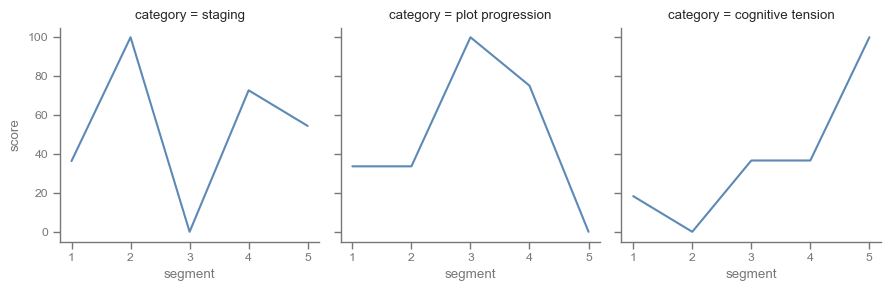

In [13]:
rc = {
 'axes.edgecolor': '#777',
 'axes.labelcolor': '#777',
 'xtick.color': '#777',
 'ytick.color': '#777',
}

sns.set_style('ticks', rc=rc)
sns.set_context('paper')
g = sns.FacetGrid(data=results_plot_df, col="category")
h = g.map(sns.lineplot, "segment", "score", color="#5c89b5", lw=1.5)